In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time



df= pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [88]:
df.groupby(' Label').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [90]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [91]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [92]:
df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)
df=df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=False)

In [93]:
df.replace("Infinity", 0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
df['Flow Bytes/s'].replace(np.nan, 0,inplace=True)


df["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)

df[" Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df[" Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" CWE Flag Count"].replace("Infinity", 0, inplace=True)
df[" CWE Flag Count"].replace(",,", 0, inplace=True)
df[" CWE Flag Count"].replace(np.nan, 0, inplace=True)

df[" Bwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd URG Flags"].replace(",,", 0, inplace=True)
df[" Bwd URG Flags"].replace(np.nan, 0, inplace=True)

df[" Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd PSH Flags"].replace(",,", 0, inplace=True)
df[" Bwd PSH Flags"].replace(np.nan, 0, inplace=True)

df[" Fwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Fwd URG Flags"].replace(",,", 0, inplace=True)
df[" Fwd URG Flags"].replace(np.nan, 0, inplace=True)

In [94]:
df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float64")
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")

In [95]:
df['Bwd Avg Bulk Rate']=df["Bwd Avg Bulk Rate"].astype("float64")
df[' Bwd Avg Packets/Bulk']=df[" Bwd Avg Packets/Bulk"].astype("float64")
df[' Bwd Avg Bytes/Bulk']=df[" Bwd Avg Bytes/Bulk"].astype("float64")
df[' Fwd Avg Bulk Rate']=df[" Fwd Avg Bulk Rate"].astype("float64")
df[' Fwd Avg Packets/Bulk']=df[" Fwd Avg Packets/Bulk"].astype("float64")
df['Fwd Avg Bytes/Bulk']=df["Fwd Avg Bytes/Bulk"].astype("float64")
df[' CWE Flag Count']=df[" CWE Flag Count"].astype("float64")
df[' Bwd URG Flags']=df[" Bwd URG Flags"].astype("float64")
df[' Bwd PSH Flags']=df[" Bwd PSH Flags"].astype("float64")
df[' Fwd URG Flags']=df[" Fwd URG Flags"].astype("float64")

In [96]:
df.replace('Infinity',0.0, inplace=True)

In [97]:
df.replace('NaN',0.0, inplace=True)

In [113]:
X=df[df.columns[0:-1]]
y=df[df.columns[-1]]
X

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [114]:
y

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name:  Label, Length: 225741, dtype: object

In [99]:
from scipy import stats

cols = list(X.columns)
for col in cols:
    X[col] = stats.zscore(X[col])

/Users/buseyarentekin/opt/anaconda3/envs/reinforcementenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/buseyarentekin/opt/anaconda3/envs/reinforcementenv/lib/python3.6/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/buseyarentekin/opt/anaconda3/envs/reinforcementenv/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in subtract
  return (a - mns) / sstd
/Users/buseyarentekin/opt/anaconda3/envs/reinforcementenv/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [74]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2.327866,-0.515216,-0.186408,-0.210193,-0.285429,-0.151984,-0.285679,-0.133982,-0.314579,-0.269509,...,-0.188389,-0.355828,-0.231636,-0.061513,-0.231148,-0.226484,-0.47235,-0.28314,-0.478369,-0.391075
1,2.337433,-0.515213,-0.251247,-0.164228,-0.287276,-0.151831,-0.285679,-0.133982,-0.314579,-0.269509,...,-0.269888,-0.355828,-0.231636,-0.061513,-0.231148,-0.226484,-0.47235,-0.28314,-0.478369,-0.391075
2,2.337484,-0.515214,-0.251247,-0.164228,-0.287276,-0.151831,-0.285679,-0.133982,-0.314579,-0.269509,...,-0.269888,-0.355828,-0.231636,-0.061513,-0.231148,-0.226484,-0.47235,-0.28314,-0.478369,-0.391075
3,1.891053,-0.515215,-0.251247,-0.164228,-0.287276,-0.151831,-0.285679,-0.133982,-0.314579,-0.269509,...,-0.269888,-0.355828,-0.231636,-0.061513,-0.231148,-0.226484,-0.47235,-0.28314,-0.478369,-0.391075
4,2.327765,-0.515216,-0.186408,-0.210193,-0.285429,-0.151984,-0.285679,-0.133982,-0.314579,-0.269509,...,-0.188389,-0.355828,-0.231636,-0.061513,-0.231148,-0.226484,-0.47235,-0.28314,-0.478369,-0.391075


In [100]:
X.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [101]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,
          "Fwd IAT Total",' Flow Packets/s', " Fwd Packet Length Mean",  "Flow Bytes/s",
          " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ]

In [102]:
X=X[features].copy()
X.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Fwd Packet Length Mean,Flow Bytes/s,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std
0,-0.285679,-0.557357,-0.269509,-0.487111,NaN,-0.314579,NaN,-0.585064,-0.794905,-0.505209,-0.70978
1,-0.285679,-0.557357,-0.269509,-0.487111,NaN,-0.314579,NaN,-0.585025,-0.789549,-0.505205,-0.70978
2,-0.285679,-0.557357,-0.269509,-0.487111,NaN,-0.314579,NaN,-0.585046,-0.789549,-0.505207,-0.70978
3,-0.285679,-0.557357,-0.269509,-0.487111,NaN,-0.314579,NaN,-0.585053,-0.789549,-0.505208,-0.70978
4,-0.285679,-0.557357,-0.269509,-0.487111,NaN,-0.314579,NaN,-0.585064,-0.794905,-0.505209,-0.70978


In [125]:
X=df[features].copy()
X.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Fwd Packet Length Mean,Flow Bytes/s,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std
0,6,0.0,0.0,3,666666.66670,6.0,4.000000e+06,3.0,0.0,3,0.0
1,6,0.0,0.0,0,18348.62385,6.0,1.100917e+05,109.0,6.0,109,0.0
2,6,0.0,0.0,0,38461.53846,6.0,2.307692e+05,52.0,6.0,52,0.0
3,6,0.0,0.0,0,58823.52941,6.0,3.529412e+05,34.0,6.0,34,0.0
4,6,0.0,0.0,3,666666.66670,6.0,4.000000e+06,3.0,0.0,3,0.0


In [126]:
len(X.columns)

11

In [127]:
def plot_train_test(train, test):
    
    data = [
        Candlestick(x=train.index, open=train['DDoS'], close=train['BENIGN'], name='train'),
        Candlestick(x=test.index, open=test['DDoS'], close=test['BENIGN'], name='test')
    ]
    layout = {
         'shapes': [
             {'x0': date_split, 'x1': date_split, 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', 'line': {'color': 'rgb(0,0,0)', 'width': 1}}
         ]
    }
    figure = Figure(data=data, layout=layout)
    iplot(figure)
    

In [110]:
plot_train_test(X, y)

NameError: name 'Candlestick' is not defined

In [ ]:
from sklearn.model_selection import train_test_split     # import module for train test split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

y_test_arr=y_test.as_matrix()

def calculate_metrics(true,false,not_detected):

  true_positive=0
  true_negative=0
  false_positive=0
  false_negative=0
  
  if 'BENIGN' in true:
    true_positive=sum(true.values())-true['BENIGN']
    true_negative=true['BENIGN']
  if 'BENIGN' in false:
    false_negative=false['BENIGN']
  if 'BENIGN' in not_detected:
    false_positive=not_detected['BENIGN']
  
  if true_positive+false_positive==0:
    precision="undefined"
  else:
    precision=(true_positive/(true_positive+false_positive))*100
  if true_positive+false_negative ==0:
    recall="undefined"
  else:
    recall=(true_positive/(true_positive+false_negative))*100
  accuracy=((true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative))*100
  print("========================================")
  print(" True positives :: ", true_positive)
  print(" True negatives :: ", true_negative)
  print(" False positive :: ", false_positive)
  print(" False negative :: ", false_negative) 
  print(" Accuracy :: ", accuracy)
  print(" Recall :: ", recall)
  print( " Precision :: ", precision)
  print("========================================")
    
    
    

In [ ]:
def calculate_confusion_matrix(y_test_arr,yhat):
  true={}
  false={}
  not_detected={}

  for x in range(len(y_test_arr)):
      if y_test_arr[x]==yhat[x]:
        if y_test_arr[x] in true:
          true[y_test_arr[x]]=true[y_test_arr[x]]+1
        else:
          true[y_test_arr[x]]=1
      elif y_test_arr[x]!=yhat[x]:
        if yhat[x] in false:
          false[yhat[x]]=false[yhat[x]]+1

          if y_test_arr[x] in not_detected:
            not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
          else:
            not_detected[y_test_arr[x]]=1

        else:
          false[yhat[x]]=1

          if y_test_arr[x] in not_detected:
            not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
          else:
            not_detected[y_test_arr[x]]=1
      
  
  calculate_metrics(true,false,not_detected)

In [120]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

In [128]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/Users/buseyarentekin/opt/anaconda3/envs/reinforcementenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


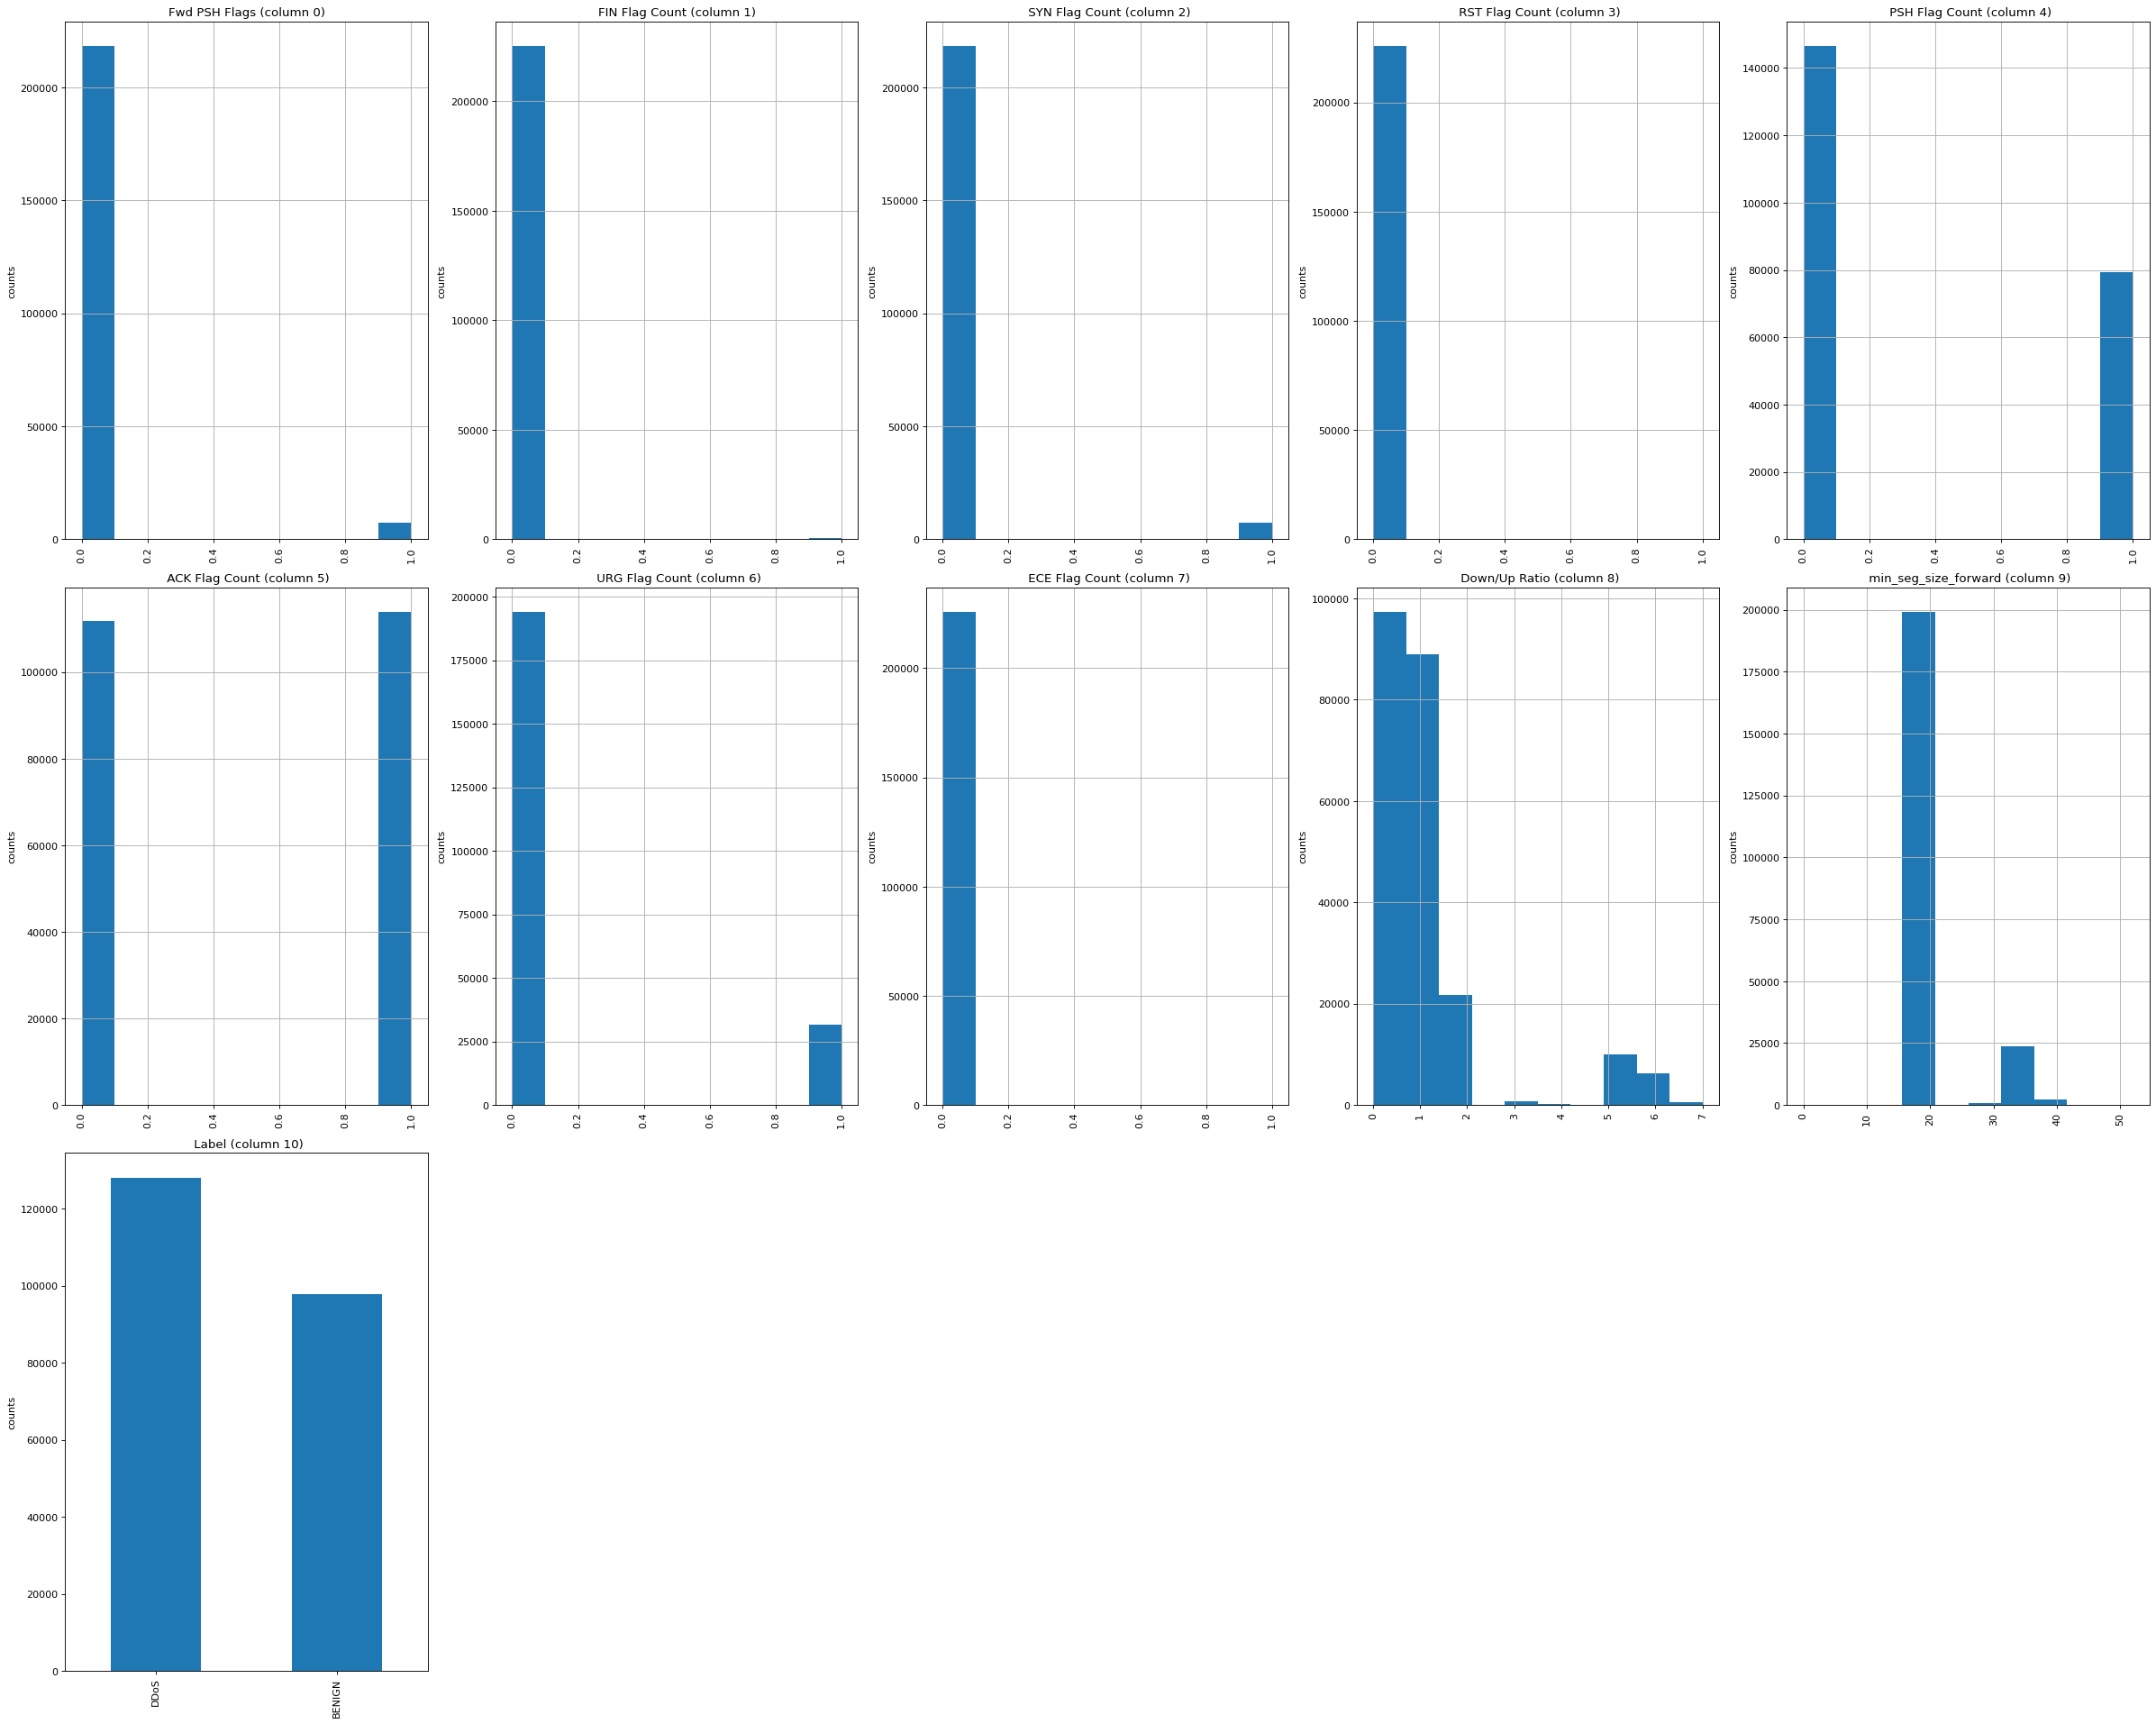

In [132]:
plotPerColumnDistribution(df, 15, 5)